In [1]:
from core.llm import get_llm
from core.llm_response_models import QueryPlanOutput

model = get_llm(provider="ollama", model_name="qwen3:4b")
structured_model = model.with_structured_output(QueryPlanOutput)

# Test with a simple prompt
test_prompt = "Generate a simple query plan for 'What is AI?'"
try:
    response = structured_model.invoke([test_prompt])
    print("Structured output works:", response)
except Exception as e:
    print("Error with structured output:", str(e))

Structured output works: queries=[PlannedQuery(query='What is AI in simple terms?', tools=[<ResearchTool.WEBSCRAPER: 'webscraper'>, <ResearchTool.WIKIPEDIA: 'wikipedia'>, <ResearchTool.TAVILY: 'tavily'>]), PlannedQuery(query='Real-world examples of AI you use daily', tools=[<ResearchTool.WEBSCRAPER: 'webscraper'>, <ResearchTool.TAVILY: 'tavily'>]), PlannedQuery(query='Current AI vs. human intelligence (narrow vs. general)', tools=[<ResearchTool.WIKIPEDIA: 'wikipedia'>, <ResearchTool.TAVILY: 'tavily'>]), PlannedQuery(query='Why do people confuse AI with consciousness?', tools=[<ResearchTool.TAVILY: 'tavily'>])] rationals='This plan focuses on: 1) Simple definitions (avoids jargon), 2) Concrete examples (relatable to daily life), 3) Current reality (narrow AI dominates), 4) Common misconceptions (consciousness). All queries target beginner-friendly answers without technical depth. Tools like Tavily provide quick, accurate responses while web scrapers gather real-world context.'


Loaded model: ollama/qwen3:4b
graph created...


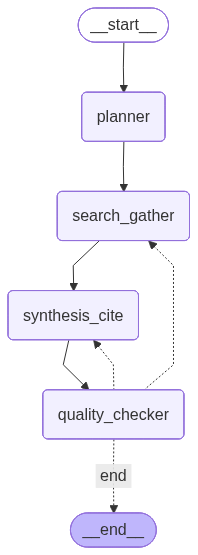

In [1]:
from core.agent import create_agent_streaming, create_agent
from core.graph import create_graph
import asyncio
from uuid import uuid4
from core.llm_response_models import ResearchDepth

model_provider: str="ollama"
model_name:str='qwen3:4b'
graph = create_graph(model_provider, model_name)
app = graph.compile()
from IPython.display import Image, display
display(
    Image(
        app.get_graph().draw_mermaid_png()
    )
)

In [2]:
import requests
response = requests.post('http://localhost:11434/api/generate', 
    json={
        'model': 'qwen3:4b',
        'prompt': 'Say hello',
        'stream': False
    }
)


In [ ]:
from core.graph import create_graph
from uuid import uuid4
from core.llm_response_models import ResearchDepth
from dotenv import load_dotenv
import asyncio
load_dotenv()

model_provider: str="openai"
model_name:str='gpt-4o-mini'


app = create_graph(model_provider, model_name)

thread_id = uuid4().hex
query = "Explain transformer architecture in AI"
research_depth = ResearchDepth.MODERATE

initial_state = {
    "original_query": query,
    "depth": research_depth,
    "iteration_count": 0,
    "max_iterations": 5, 
    "is_complete": False,
    "search_results": [],
}

# try:
#     print("Invoking app")
#     print(f"Initial state: {initial_state}")
#     result = app.invoke(initial_state, {"configurable": {"thread_id": thread_id}})
#     print("=" * 50)
#     print("FINAL RESULT:")
#     print(result)
# except Exception as e:
#     print(f"Error occurred: {str(e)}")
#     import traceback
#     traceback.print_exc()

In [4]:
from core.llm_response_models import ResearchDepth
from uuid import uuid4
research_depth = ResearchDepth.MODERATE
thread_id = uuid4().hex
query = "Explain transformer architecture in AI"
initial_state = {
    "original_query": query,
    "depth": research_depth,
    "iteration_count": 0,
    "max_iterations": 5, 
    "is_complete": False,
    "search_results": [],
}
print(initial_state['depth'])

ResearchDepth.MODERATE


## Testing Tools

In [1]:
from core.tools.wikipedia_search import wikipedia_search
from core.tools.arxiv_search import arxiv_search
from core.tools.tavily_search import tavily_search_tool
from core.llm_response_models import PlannedQuery, ResearchTool, SearchQueryResult
from core.graph import get_source_type, parse_tool_results
queries=[
    PlannedQuery(
        query='Overview of transformer architecture in artificial intelligence', 
        tools=[ResearchTool.WIKIPEDIA, ResearchTool.TAVILY]
    ), 
    PlannedQuery(
        query='Recent advancements in transformer models for natural language processing', 
        tools=[ResearchTool.TAVILY, ResearchTool.ARXIV]
    ),
    PlannedQuery(
        query='Comparative analysis of transformer architecture vs. recurrent neural networks', 
        tools=[ResearchTool.ARXIV, ResearchTool.TAVILY]
    )
]

all_results = []
TOOL_FUNCTIONS = {
    ResearchTool.TAVILY: tavily_search_tool,
    ResearchTool.WIKIPEDIA: wikipedia_search,
    ResearchTool.ARXIV: arxiv_search,
}

for q in queries:
    for tool in q.tools:
        try:
            print("Using tool: ", tool)
            tool_input = q.query
            raw_result = TOOL_FUNCTIONS[tool](tool_input)

            search_result = SearchQueryResult(
                            query=q.query,
                            tool=tool,
                            source_type=get_source_type(tool),
                            results=parse_tool_results(raw_result, tool)
                        )
            all_results.append(search_result)

        except Exception as e:
            print(f"Error executing tool: {str(e)}")
            continue



Using tool:  ResearchTool.WIKIPEDIA
Using tool:  ResearchTool.TAVILY
Using tool:  ResearchTool.TAVILY
Using tool:  ResearchTool.ARXIV
Using tool:  ResearchTool.ARXIV
Using tool:  ResearchTool.TAVILY


In [2]:
from core.graph import format_search_results
print(all_results)
formatted_results = format_search_results(all_results)
print(formatted_results)

[SearchQueryResult(query='Overview of transformer architecture in artificial intelligence', tool=<ResearchTool.WIKIPEDIA: 'wikipedia'>, source_type=<SourceType.WIKIPEDIA: 'wikipedia'>, timestamp=datetime.datetime(2025, 11, 17, 18, 15, 1, 987916), results=[SearchResult(title='Generative artificial intelligence', url='https://en.wikipedia.org/wiki/Generative_artificial_intelligence', content='Generative artificial intelligence (Generative AI, GenAI, or GAI) is a subfield of artificial intelligence that uses generative models to produce text, images, videos, audio, software code or other forms of data. These models learn the underlying patterns and structures of their training data and use them to produce new data based on the input, which often comes in the form of natural language prompts.\nGenerative AI tools have become more common since the AI boom in the 2020s. This boom was made possible by improvements in transformer-based deep neural networks, particularly large language models (